# IBM Applied Data Science Capstone Project - Car Accident Severity
### By Yazan Hassan


## Introduction

The global epidemic of road crash fatalities and disabilities is gradually being recognized as a major public health concern. The first step to being informed about global road safety and to developing effective road safety interventions is to have access to facts. Approximately 1.35 million people die in road crashes each year, with the daily global death toll being about 3,700 people. An additional 20-50 million suffer non-fatal injuries every year, often resulting in long-term disabilities (https://www.asirt.org/safe-travel/road-safety-facts/).

Accidents that occur in junctions can be slight, fatal and serious. As such, a good mitigation tactic is to be able to reduce the risk of severity before accidents occur. In an effort to reduce the frequency of car collisions in a community, an algorithm can be developed to predict the severity of an accident given the weather, road and visibility conditions. When conditions are unfavourable, the model will alert drivers to remind them to be more careful or to take a safer route. The aim of this project is to build a model that can predict the severity of accidents in junctions around different types of address block and collision types using attributes such as weather and light conditions. For this model, Seattle will be used as a test case. 

### Target Audience

The target audiences of the project are local Seattle government, police, rescue groups, and car insurance institutes. The model and its results can provide some advice for the target audiences to make insightful decisions for reducing the number of accidents and injuries in the city. For instance, this project can help local authorities discover the address type where severity of a road accident is serious due to lack of road lighting, and subsequently apply new road safety measures. The Seattle government can prevent avoidable car accidents by employing methods that alert drivers, health system, and police to remind them to be more careful in critical situations.


## Data
The dataset has information gathered on the road traffic accidents of Seattle City. The initial dataset consists of 38 columns (features/attributes) and 194673 rows.  The data was collected by the Seattle Police Department and Accident Traffic Records Department from 2004 to present. The dependent variable, “SEVERITYCODE”, contains numbers that correspond to different levels of severity caused by an accident from 0 to 4.

Python packages will be used to conduct this study. The dataset will be cleaned according to the requirements of this project. Furthermore, because of the existence of null values in some records, the data needs to be preprocessed before any further processing.

**The features used will be:**
- SEVERITYCODE 
- UNDERINFL 
- SPEEDING 
- INATTENTIONIND 
- WEATHER 
- LIGHTCOND 

The data used for this study is given by the Applied Data Science Capstone course on Coursera via the following link https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import svm
from sklearn import metrics
import pydotplus
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import folium
import webbrowser
from folium import plugins
from imblearn.over_sampling import SMOTE
%matplotlib inline

### Import Data and Exploratory Analysis

In [2]:
df = pd.read_csv("Data-Collisions.csv")
df

/Users/yazanhassan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


In [3]:
# Shape of dataframe
df.shape

(194673, 38)

In [4]:
# Explore the columns of the dataframe
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
# Descriptive stats
descriptive_stats= df.describe(include="all")
descriptive_stats

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1780512,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


### Data Wrangling

From the above attributes, we can see that many of them are irrelevant. As such, irrelevant attributes of data will be expunged from further consideration. For this model, we are only interested in the following attributes:

* INATTENTIONIND, UNDERINFL, ROADCOND, WEATHER, LIGHTCOND, SPEEDING, SEVERITYCODE  

More info can be found on the attributes here: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

As a reminder, in SEVERITYCODE:
* 2 — injury
* 1 — property damage only


In [6]:
# Converting Severity Code from (1/2) to binary

severity_code = df['SEVERITYCODE'].values

labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

df ["SEVERITYCODE"] = severity_code

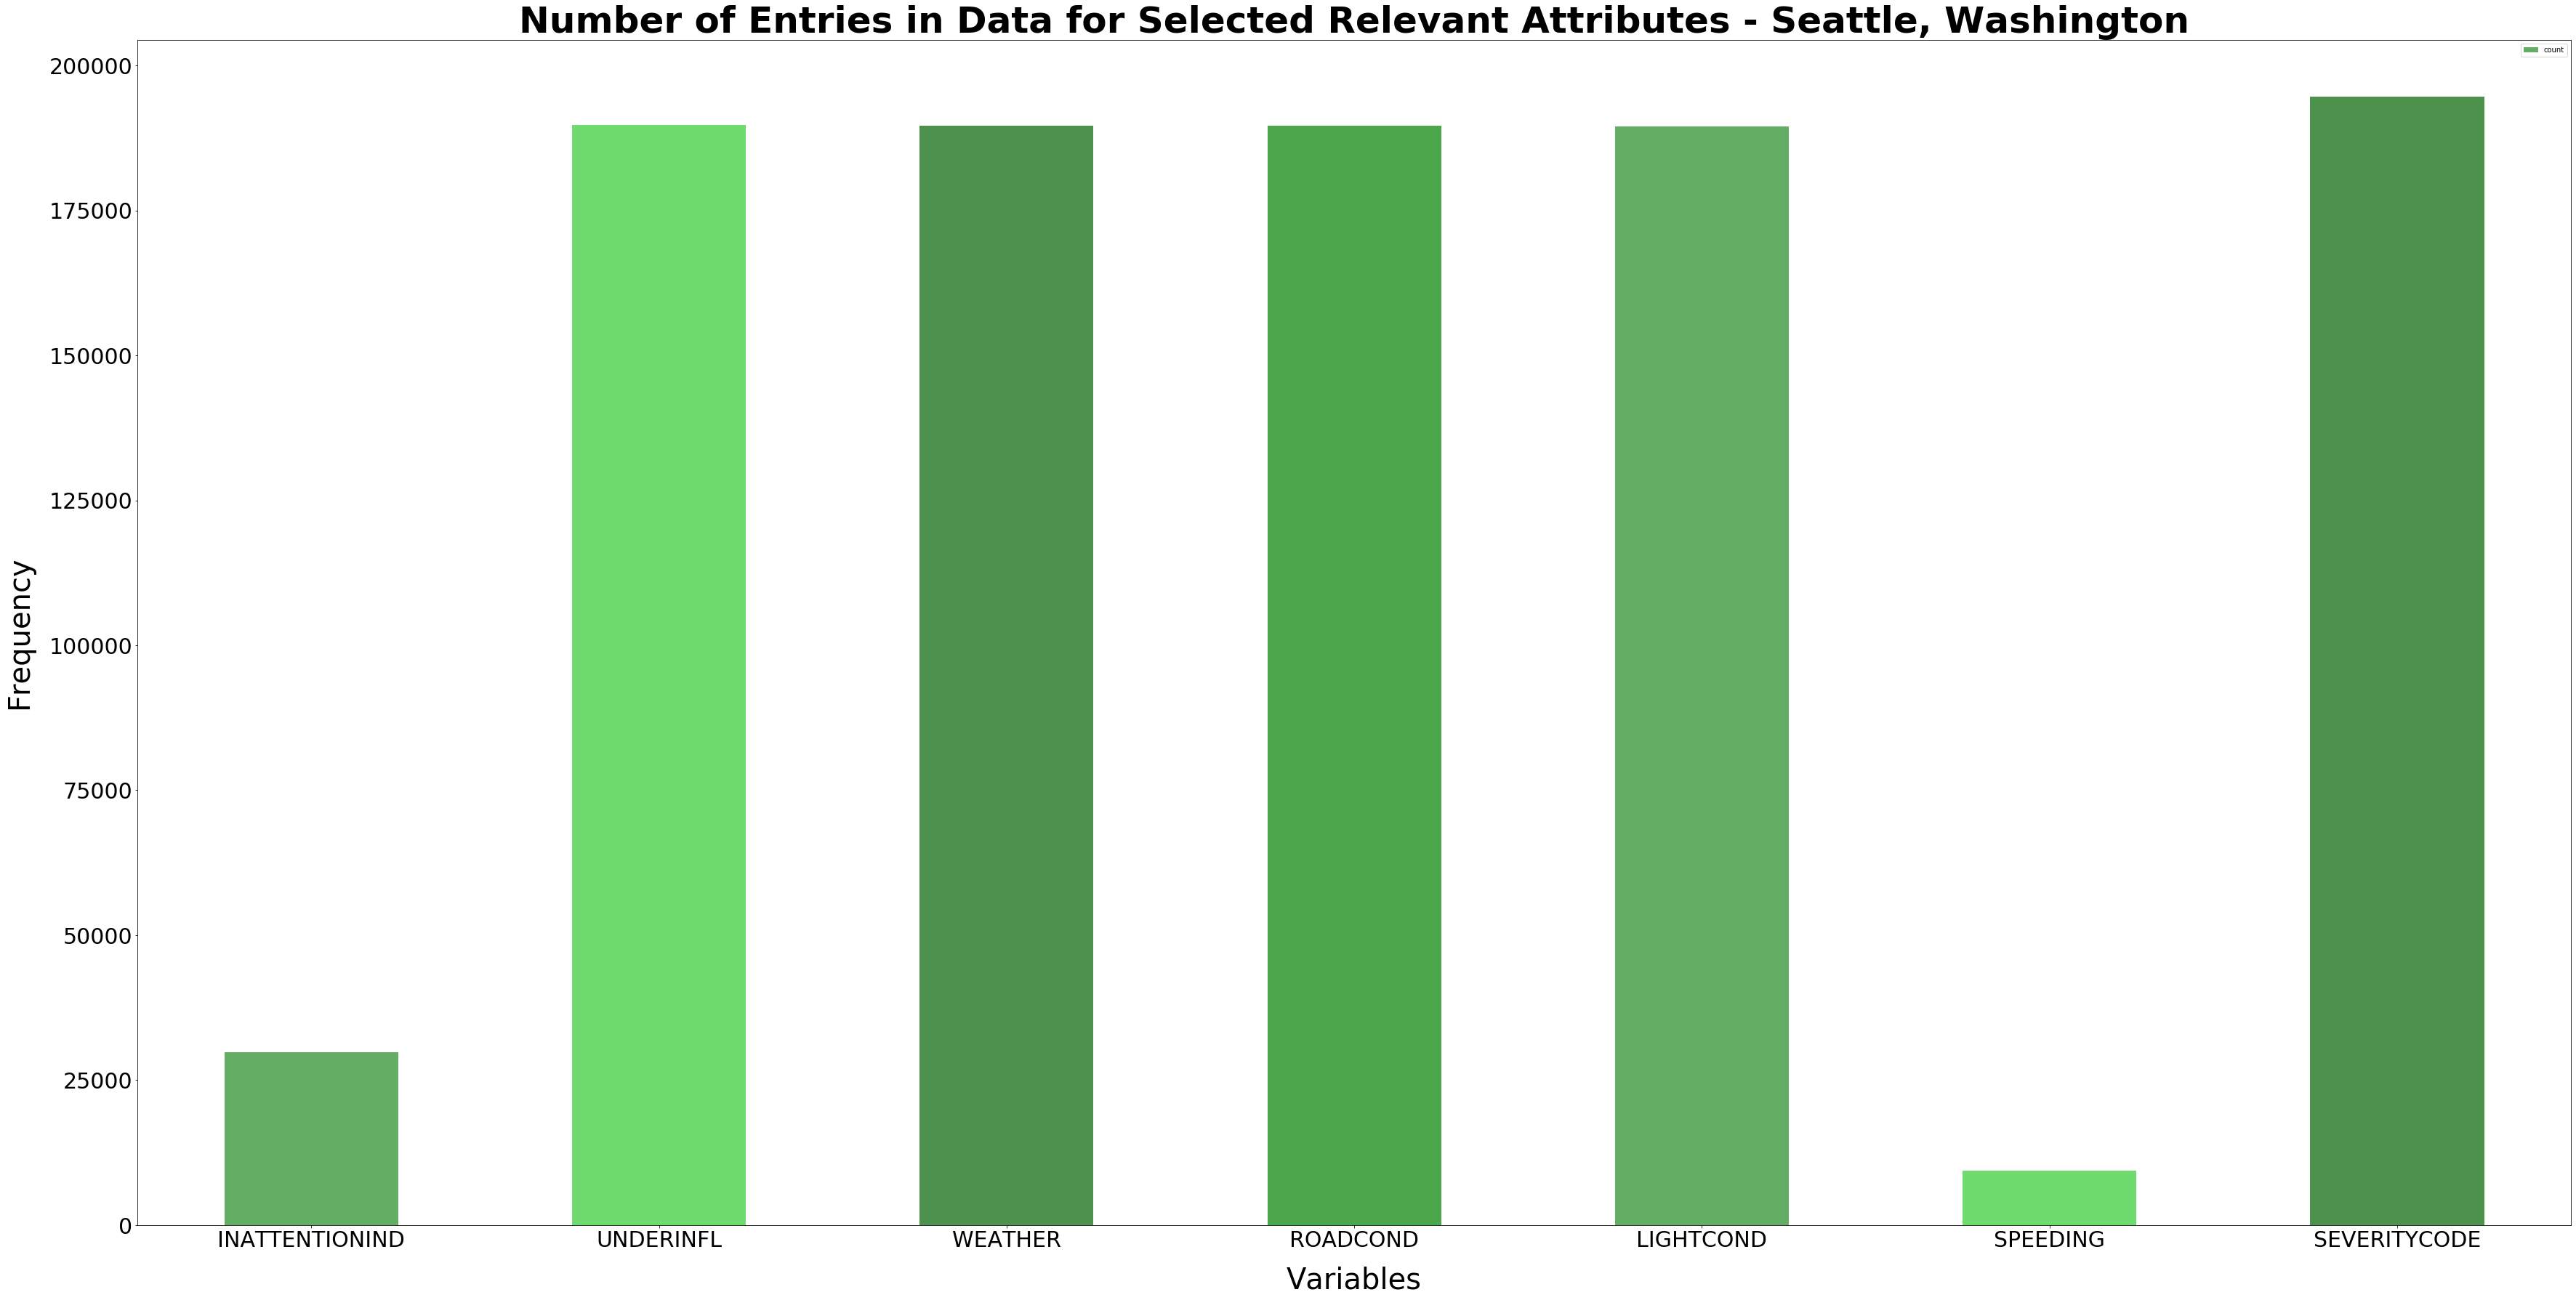

In [8]:
#Plotting counts of selected variables

descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

color_yo=['forestgreen','limegreen','darkgreen','green','forestgreen','limegreen','darkgreen']
descriptive_stats_plot.plot(kind='bar',alpha=0.70,color=[color_yo])
plt.title('Number of Entries in Data for Selected Relevant Attributes - Seattle, Washington', fontsize=50, fontweight='bold')
plt.xlabel("Variables",fontsize=40,labelpad=20)
plt.ylabel("Frequency",fontsize=40,labelpad=20)
plt.rcParams['figure.figsize'] = [60, 30]
plt.xticks(fontsize=30, rotation=360)
plt.yticks(fontsize=30)
plt.show()

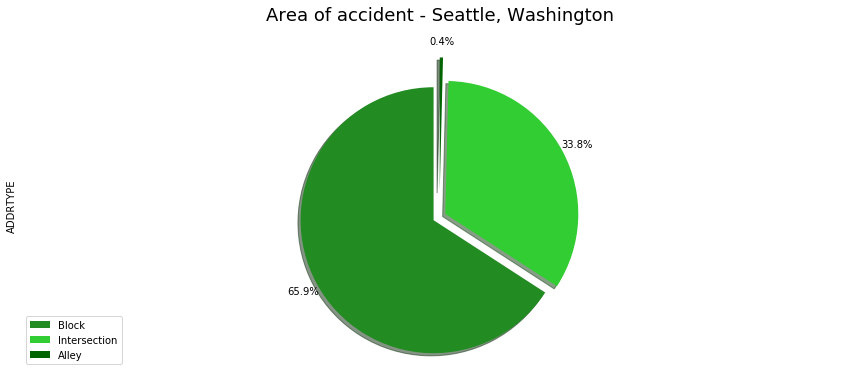

In [3]:
#Area type of each accident
explode_list = [0.05, 0.05, 0.2]
color_list=['forestgreen','limegreen','darkgreen']
addtype=df['ADDRTYPE'].value_counts()

addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            explode=explode_list)


plt.title('Area of accident - Seattle, Washington', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='lower left')

plt.show()

In [11]:
# Check unique number of incidents - INCKEY
df['INCKEY'].nunique()

194673

## Convert Categorical Features to Numerical Values

In [12]:
# Encoding Inattention (0 = No, 1 = Yes)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)

In [13]:
# Encoding Speeding (0 = No, 1 = Yes)
df["SPEEDING"].replace("Y", 1, inplace=True)
df["SPEEDING"].replace(np.nan, 0, inplace=True)

In [14]:
# Encoding Under The Influence (0 = No, 1 = Yes)
df["UNDERINFL"].replace("N", 0, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)

In [15]:
# Encoding Road Conditions (0 = Dry, 1 = Mushy, 2 = Wet)
df["ROADCOND"].replace("Dry", 0, inplace=True)
df["ROADCOND"].replace("Wet", 2, inplace=True)
df["ROADCOND"].replace("Ice", 2, inplace=True)
df["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)
df["ROADCOND"].replace("Standing Water", 2, inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
df["ROADCOND"].replace("Oil", 2, inplace=True)

In [16]:
# Encoding Weather Conditions (0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow)
df["WEATHER"].replace("Clear", 0, inplace=True)
df["WEATHER"].replace("Partly Cloudy", 1, inplace=True)
df["WEATHER"].replace("Overcast", 1, inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
df["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
df["WEATHER"].replace("Raining", 3, inplace=True)
df["WEATHER"].replace("Other", "Unknown", inplace=True)
df["WEATHER"].replace("Snowing", 3, inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)

In [17]:
# Encoding Light Conditions (0 = Light, 1 = Medium, 2 = Dark)
df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df["LIGHTCOND"].replace("Dusk", 1, inplace=True)
df["LIGHTCOND"].replace("Dawn", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
df["LIGHTCOND"].replace("Other","Unknown", inplace=True)

## Feature Selection & Additional Data Cleaning

In [19]:
# Creating the Feature dataframe
attributes = df[["INCKEY","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
feature_df = attributes.copy()
feature_df

,INCKEY,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,1307,0.0,0,1,2,0,0.0,1
1,52200,0.0,0,3,2,1,0.0,0
2,26700,0.0,0,1,0,0,0.0,0
3,1144,0.0,0,0,0,0,0.0,0
4,17700,0.0,0,3,2,0,0.0,1
...,...,...,...,...,...,...,...,...
194668,309534,0.0,0,0,0,0,0.0,1
194669,309085,1.0,0,3,2,0,0.0,0
194670,311280,0.0,0,0,0,0,0.0,1
194671,309514,0.0,0,0,0,1,0.0,1


In [20]:
feature_df.dropna(axis=0, how='any', inplace=True)
feature_df.describe()

,INCKEY,INATTENTIONIND,SPEEDING,SEVERITYCODE
count,189337.000000,189337.000000,189337.000000,189337.000000
mean,138219.402637,0.156985,0.049219,0.301325
std,85253.279966,0.363787,0.216326,0.458835
min,1001.000000,0.000000,0.000000,0.000000
25%,69016.000000,0.000000,0.000000,0.000000
50%,120374.000000,0.000000,0.000000,0.000000
75%,198867.000000,0.000000,0.000000,1.000000
max,331342.000000,1.000000,1.000000,1.000000


In [21]:
np.count_nonzero(feature_df['UNDERINFL'])

89474

In [22]:
# Light Condition size
lightcondsize = feature_df["LIGHTCOND"].size
lightcondsize

189337

In [23]:
feature_df

,INCKEY,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,1307,0.0,0,1,2,0,0.0,1
1,52200,0.0,0,3,2,1,0.0,0
2,26700,0.0,0,1,0,0,0.0,0
3,1144,0.0,0,0,0,0,0.0,0
4,17700,0.0,0,3,2,0,0.0,1
...,...,...,...,...,...,...,...,...
194668,309534,0.0,0,0,0,0,0.0,1
194669,309085,1.0,0,3,2,0,0.0,0
194670,311280,0.0,0,0,0,0,0.0,1
194671,309514,0.0,0,0,0,1,0.0,1


In [24]:
feature_df['LIGHTCOND'].value_counts()

0          116077
1           56831
Unknown     13691
2            2738
Name: LIGHTCOND, dtype: int64

In [25]:
# Light Condition

featureinlightcond = feature_df['LIGHTCOND'] == 'Unknown'

lightcond = feature_df['LIGHTCOND']
lightcond = lightcond.values
lightcond = lightcond[featureinlightcond]

lightcond[0:9036]=0
lightcond[9036:13417]=1
lightcond[13417:13961]=2

feature_df.loc [feature_df.LIGHTCOND == "Unknown", 'LIGHTCOND'] = lightcond

feature_df["LIGHTCOND"]=feature_df["LIGHTCOND"].astype(int)

In [26]:
feature_df['LIGHTCOND'].value_counts()

0    125113
1     61212
2      3012
Name: LIGHTCOND, dtype: int64

In [27]:
feature_df['ROADCOND'].value_counts()

0          124300
2           48802
Unknown     15162
1            1073
Name: ROADCOND, dtype: int64

In [28]:
# Road Condition

featureinroadcond = feature_df ['ROADCOND'] == 'Unknown'

roadcond = feature_df['LIGHTCOND']
roadcond = roadcond.values
roadcond = roadcond[featureinroadcond]

roadcond[0:9954]=0
roadcond[9954:10040]=1
roadcond[10040:15162]=2

feature_df.loc[feature_df.ROADCOND == "Unknown", 'ROADCOND'] = roadcond
feature_df["ROADCOND"]=feature_df["ROADCOND"].astype(int)

In [29]:
feature_df['ROADCOND'].value_counts()

0    134254
2     53924
1      1159
Name: ROADCOND, dtype: int64

In [30]:
feature_df['WEATHER'].value_counts()

0          111008
3           34131
1           27686
Unknown     15863
2             649
Name: WEATHER, dtype: int64

In [31]:
# Weather Condition

weathersize = feature_df ["WEATHER"].size

featureinweather = feature_df ['WEATHER'] == 'Unknown'

weather = feature_df['WEATHER']
weather = weather.values
weather = weather[featureinweather]

weather[0:10151]=0
weather[10151:12683]=1
weather[12683:12742]=2
weather[12742:15863]=3

feature_df.loc[feature_df.WEATHER == "Unknown", 'WEATHER'] = weather
feature_df["WEATHER"]=feature_df["WEATHER"].astype(int)

In [32]:
feature_df['WEATHER'].value_counts()

0    121159
3     37252
1     30218
2       708
Name: WEATHER, dtype: int64

In [33]:
# Convert Speeding, Inattention, and Under Influence attributes to integers
feature_df["SPEEDING"]=feature_df["SPEEDING"].astype(int)
feature_df["INATTENTIONIND"]=feature_df["INATTENTIONIND"].astype(int)
feature_df["UNDERINFL"]=feature_df["UNDERINFL"].astype(int)

## Creating ML Test and Train Sets

In [34]:
# ML Feature Sets
X=feature_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=feature_df[["SEVERITYCODE"]].values

In [35]:
# Test/Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (142002, 6) (142002, 1)
Test set: (47335, 6) (47335, 1)


## Balanace and Normalize Data

In [36]:
# Balance the Data
os = SMOTE (random_state=0)
os_data_X, os_data_y= os.fit_sample(X_train, y_train)

## Decision Tree Classification

In [37]:
# Decision Tree Clasifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth=6)
DT.fit(os_data_X,os_data_y)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [38]:
# Make Prediction:
yhatDT = DT.predict(X_test)

# Check Accuracy
print('Accuracy score for Decision Tree = ', accuracy_score(yhatDT, y_test))

Accuracy score for Decision Tree =  0.581134467096229


In [39]:
# Visualization
print('Confusion Matrix - Decision Tree')
print(pd.crosstab(y_test.ravel(), yhatDT.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Decision Tree
Predicted      0      1    All
True                          
0          21524  11489  33013
1           8338   5984  14322
All        29862  17473  47335


In [40]:
print(classification_report(yhatDT,y_test))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68     29862
           1       0.42      0.34      0.38     17473

    accuracy                           0.58     47335
   macro avg       0.53      0.53      0.53     47335
weighted avg       0.57      0.58      0.57     47335



Confusion matrix, without normalization
[[ 5984  8338]
 [11489 21524]]


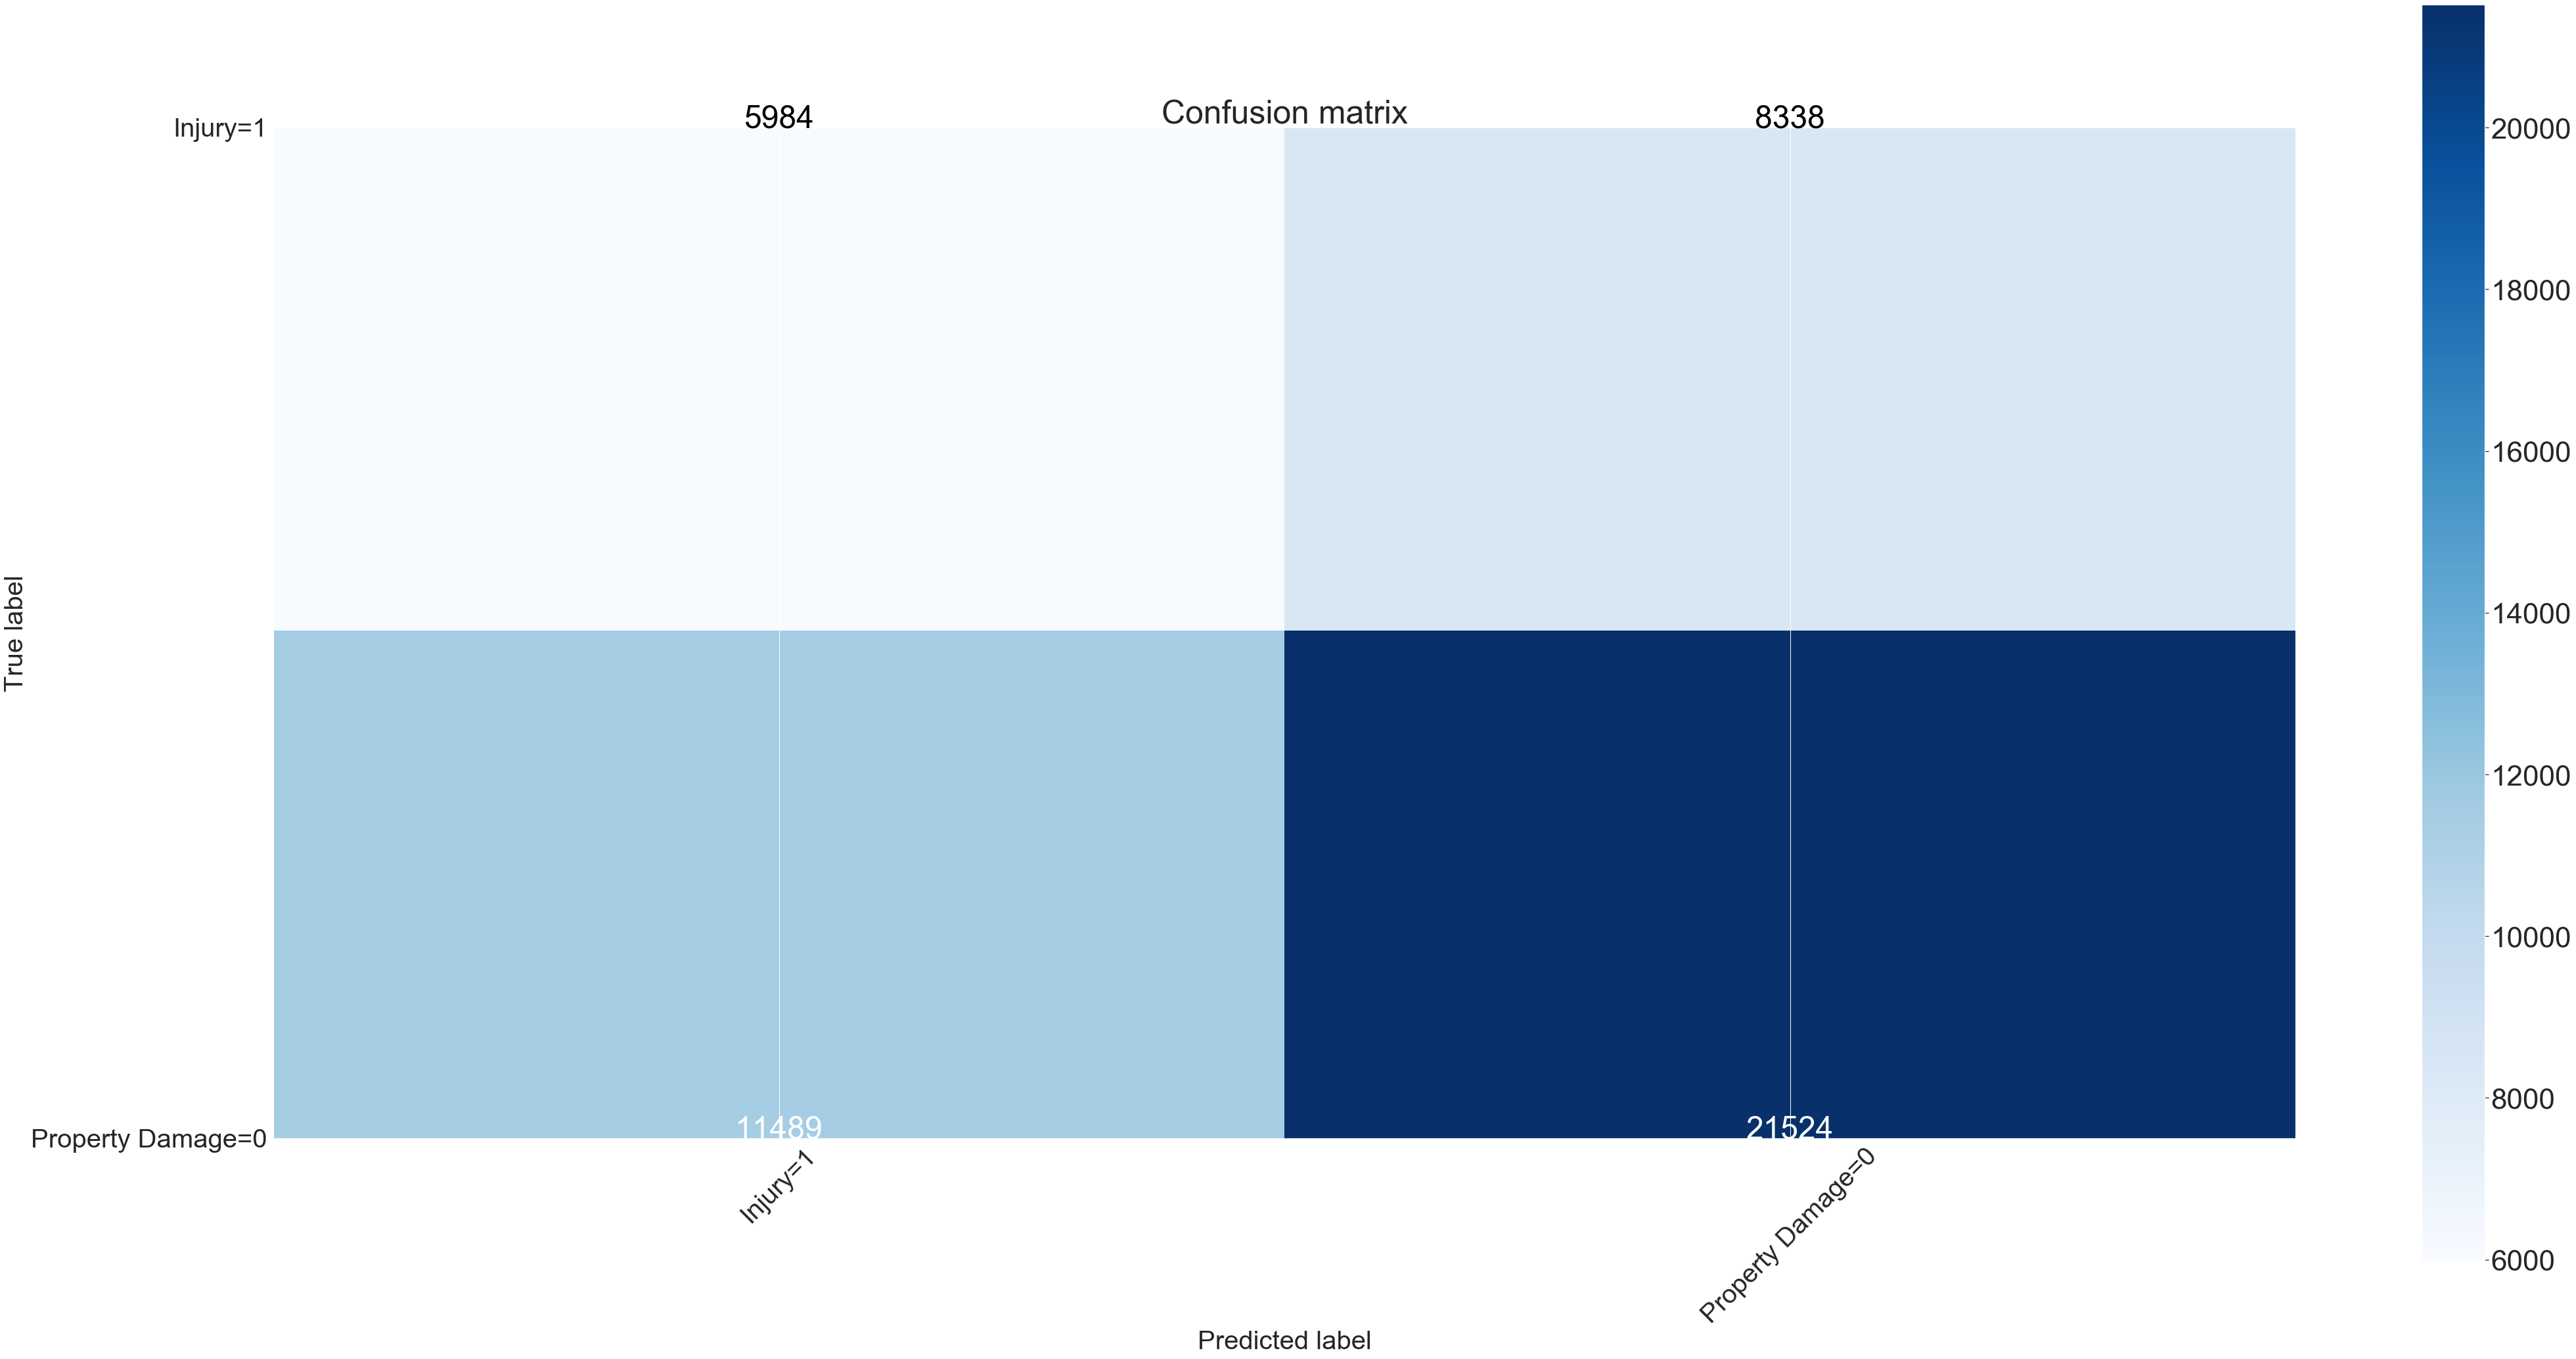

In [42]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=50)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=40)
    plt.yticks(tick_marks, classes, fontsize=40)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt,),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=40)
    plt.xlabel('Predicted label', fontsize=40)
    sns.set(font_scale=4.0)

cnf_matrix = confusion_matrix(y_test, yhatDT, labels=[1,0])
np.set_printoptions(precision=2)

# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

## Logistic Regression

In [43]:
#Logistic Regression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(os_data_X,os_data_y)

yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

In [44]:
print(log_loss(y_test, yhat_prob))

print ("Accuracy", accuracy_score(yhatLR,y_test))
print (classification_report(y_test, yhatLR))

cnf_matrix = confusion_matrix(y_test, yhatLR, labels=[1,0])
np.set_printoptions(precision=2)

0.6891345968945984
Accuracy 0.5849582761170381
              precision    recall  f1-score   support

           0       0.72      0.66      0.69     33013
           1       0.34      0.41      0.37     14322

    accuracy                           0.58     47335
   macro avg       0.53      0.53      0.53     47335
weighted avg       0.61      0.58      0.59     47335



Confusion matrix, without normalization
[[ 5837  8485]
 [11161 21852]]


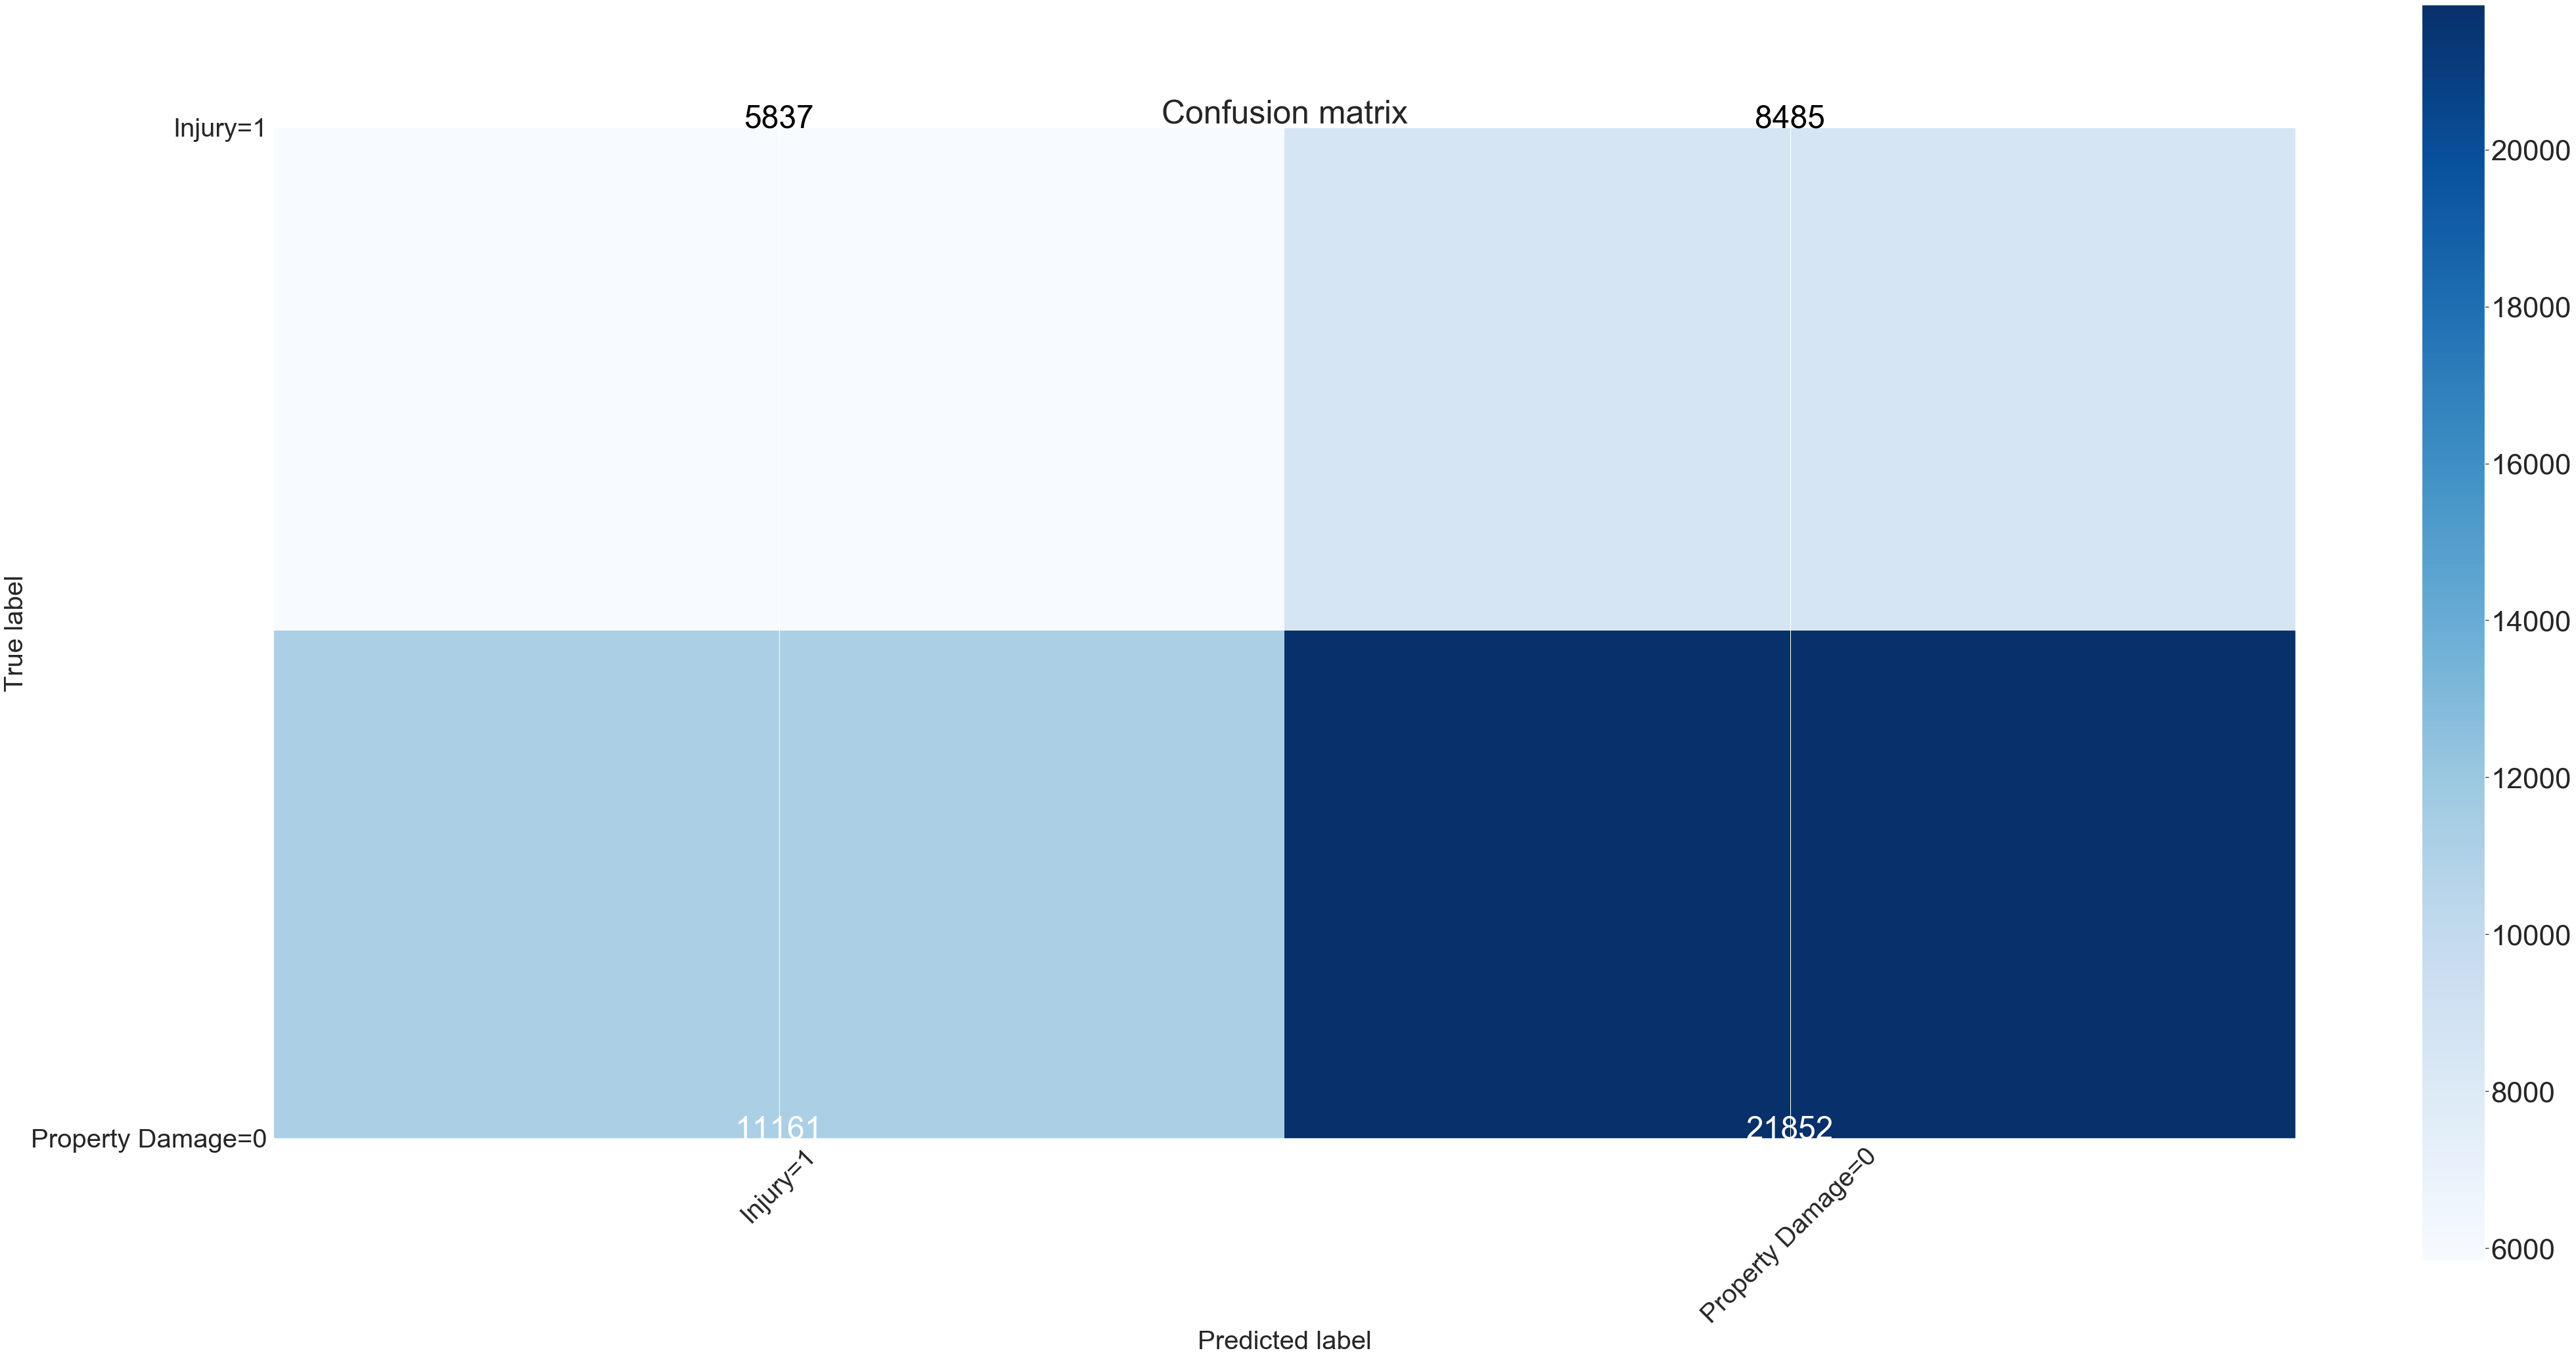

In [45]:
# Plot confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

##  K Nearest Neighbor (KNN)

In [54]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

bestScore=0.0
accList=[]

for k in range(3,12):
    
    clf_knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    
    # using 10 fold cross validation for scoring the classifier's accuracy
    scores = cross_val_score(clf_knn, X, y.ravel(), cv=10)
    score=scores.mean()
    accList.append(score)
    
    if score > bestScore:
        bestScore=score
        best_clf=clf_knn
        bestK=k
        
print("Best K is :",bestK,"| Cross validation Accuracy :",bestScore)
clf_knn=best_clf

Best K is : 10 | Cross validation Accuracy : 0.690461899717634


In [56]:
clf_knn.fit(X_train,y_train.ravel())
yknn_pred=best_clf.predict(X_train)

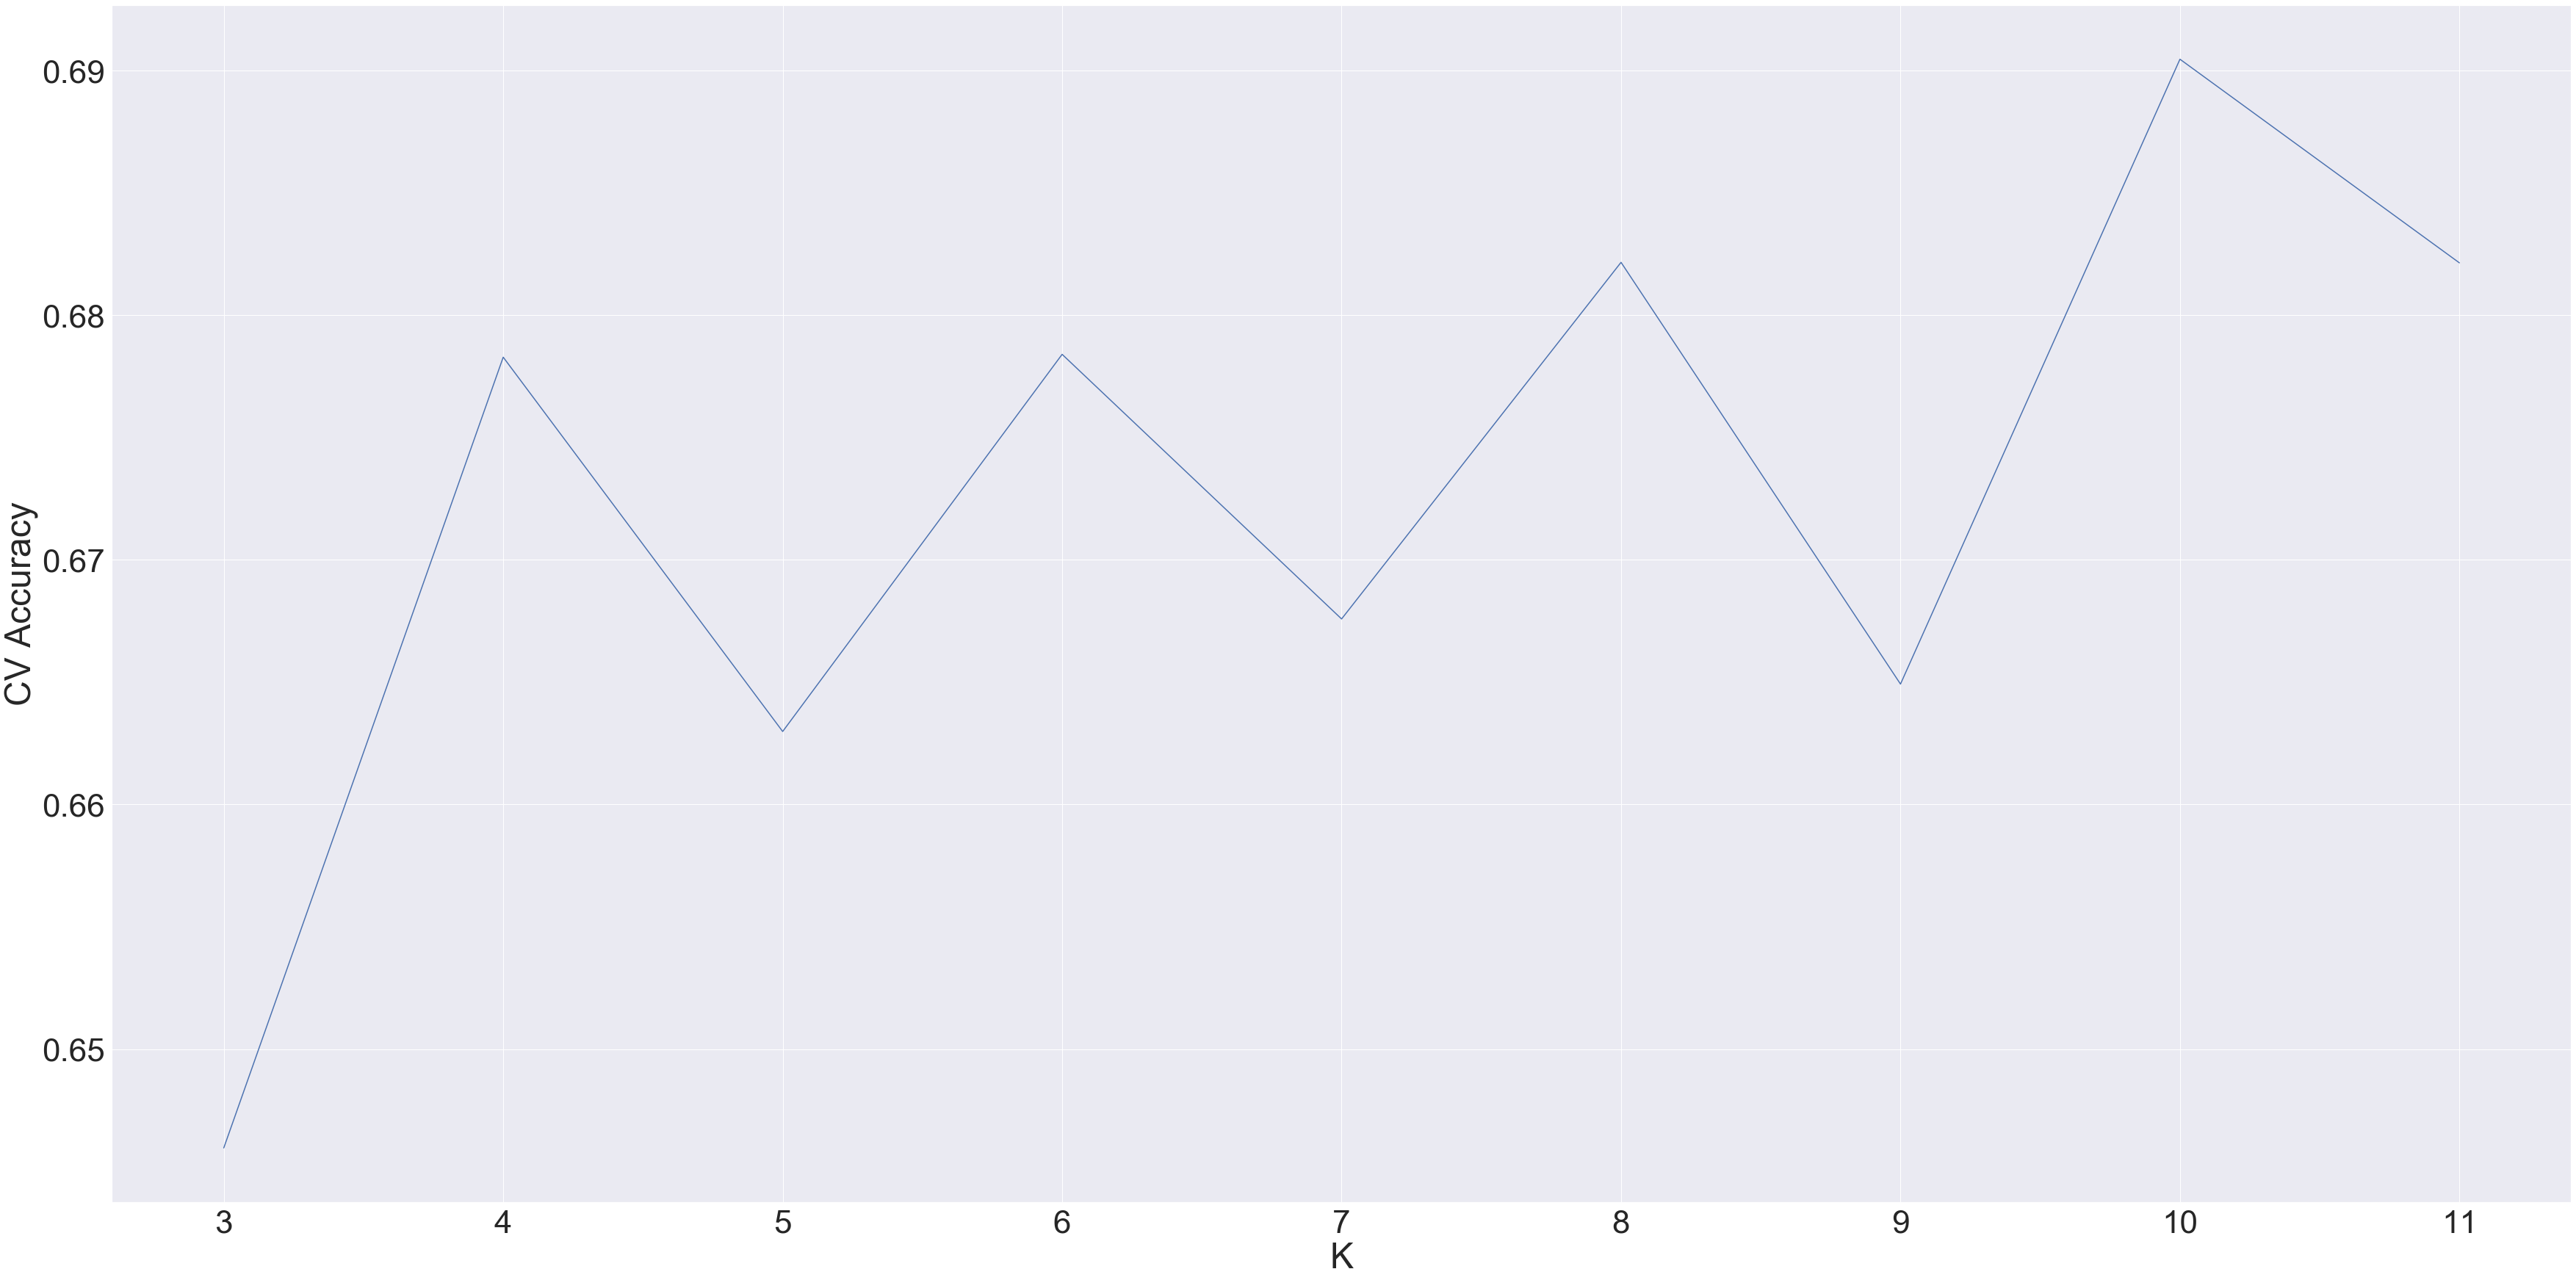

In [57]:
plt.plot(range(3,12),accList)
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.show()

In [66]:
yknn_pred.shape

(142002,)

In [67]:
y_test.shape

(47335, 1)

In [71]:
KNNf1score =f1_score(y_train, yknn_pred, average='weighted')
KNNf1score

0.555808952766952